In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
from zipfile import ZipFile
dataset = '/content/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [ ]:
print('Number of with mask images:', len(with_mask))
print('Number of without mask images:', len(without_mask))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# Creating Labels for with and without mask images.
# With Mask = 1
# Without Mask = 0


with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(len(with_mask_labels))
print(len(without_mask_labels))
labels = with_mask_labels + without_mask_labels

3725
3828


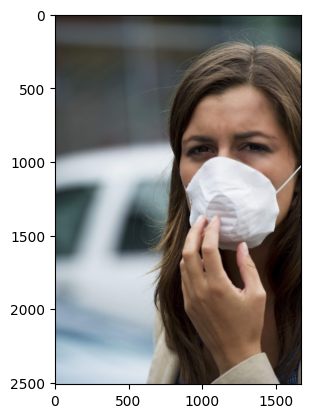

In [ ]:
# Displaying a random with mask image.
img = mpimg.imread('/content/data/with_mask/with_mask_3357.jpg')
imgplot = plt.imshow(img)
plt.show()

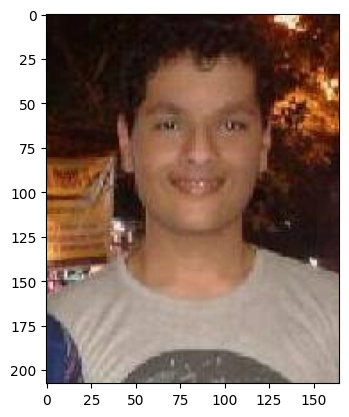

In [ ]:
# Displaying a random without mask image.
img = mpimg.imread('/content/data/without_mask/without_mask_1333.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

In [ ]:
# Converting Images into Numpy Arrays.

data = []
with_mask_path = '/content/data/with_mask/'

for img_name in with_mask:
  image = Image.open(with_mask_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')  # Because some pictures are in Black & White format
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_name in without_mask:
  image = Image.open(without_mask_path + img_name)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Converting data list and labels list into Numpy Arrays

A = np.array(data)
B = np.array(labels)

In [ ]:
print(A.shape)
print(B.shape)

(7553, 128, 128, 3)
(7553,)


**Train & Test Split**

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(A , B , test_size = 0.2 , random_state = 3)
print(X_train.shape , X_test.shape , A.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (7553, 128, 128, 3)


array([[[183, 183, 183],
        [190, 190, 190],
        [188, 188, 188],
        ...,
        [196, 196, 196],
        [196, 196, 196],
        [196, 196, 196]],

       [[186, 186, 186],
        [190, 190, 190],
        [183, 183, 183],
        ...,
        [196, 196, 196],
        [196, 196, 196],
        [196, 196, 196]],

       [[188, 188, 188],
        [189, 189, 189],
        [182, 182, 182],
        ...,
        [196, 196, 196],
        [196, 196, 196],
        [196, 196, 196]],

       ...,

       [[ 58,  36,  53],
        [ 53,  34,  50],
        [ 78,  61,  74],
        ...,
        [119, 123, 128],
        [140, 143, 148],
        [158, 161, 166]],

       [[ 32,  18,  30],
        [ 30,  18,  29],
        [ 42,  31,  40],
        ...,
        [ 66,  69,  74],
        [ 78,  81,  86],
        [110, 113, 118]],

       [[ 21,  13,  21],
        [ 22,  15,  22],
        [ 21,  17,  22],
        ...,
        [ 72,  75,  80],
        [ 66,  69,  74],
        [ 76,  79,  84]]], dtype=uint8)
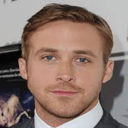

In [ ]:
X_train[0]

In [ ]:
# Scalling the Data

X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_train_scaled[0]


array([[[0.71764706, 0.71764706, 0.71764706],
        [0.74509804, 0.74509804, 0.74509804],
        [0.7372549 , 0.7372549 , 0.7372549 ],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745]],

       [[0.72941176, 0.72941176, 0.72941176],
        [0.74509804, 0.74509804, 0.74509804],
        [0.71764706, 0.71764706, 0.71764706],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745]],

       [[0.7372549 , 0.7372549 , 0.7372549 ],
        [0.74117647, 0.74117647, 0.74117647],
        [0.71372549, 0.71372549, 0.71372549],
        ...,
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745],
        [0.76862745, 0.76862745, 0.76862745]],

       ...,

       [[0.22745098, 0.14117647, 0.20784314],
        [0.20784314, 0.13333333, 0.19607843],
        [0.30588235, 0

**Building A Convolutional Neural Network (CNN)**

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# Compiling the Neural Network

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['acc'])

In [ ]:
# Training the Neural Network

history = model.fit(X_train_scaled , Y_train , epochs = 4 , validation_split = 0.1)

Epoch 1/4
170/170 [==============================] - 173s 1s/step - loss: 0.5303 - acc: 0.7638 - val_loss: 0.3032 - val_acc: 0.8760
Epoch 2/4
170/170 [==============================] - 166s 974ms/step - loss: 0.3211 - acc: 0.8740 - val_loss: 0.3271 - val_acc: 0.8760
Epoch 3/4
170/170 [==============================] - 163s 962ms/step - loss: 0.2727 - acc: 0.8889 - val_loss: 0.2220 - val_acc: 0.9107
Epoch 4/4
170/170 [==============================] - 174s 1s/step - loss: 0.2060 - acc: 0.9198 - val_loss: 0.2172 - val_acc: 0.9207


**Model Evaluation**

In [ ]:
loss , accuracy = model.evaluate(X_test_scaled , Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 11s 217ms/step - loss: 0.1801 - acc: 0.9325
Test Accuracy =  0.9324950575828552


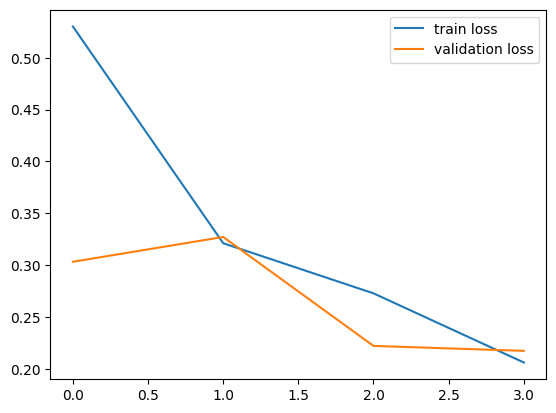

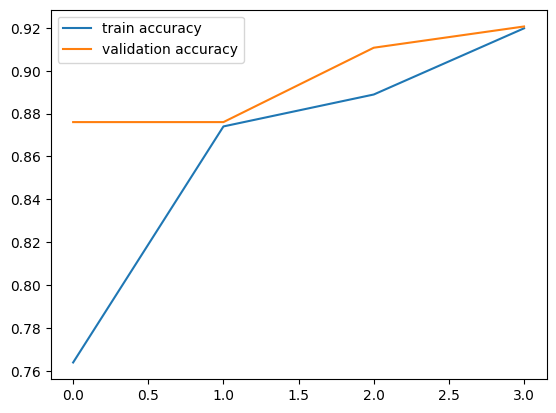

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Machine Prediction**

Path of the image to be predicted: /content/data/with_mask/with_mask_100.jpg


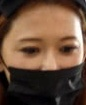

1/1 [==============================] - 0s 52ms/step
[[0.26728308 0.61667544]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')